Installing req library to get stock data

In [ ]:
pip install yfinance

Data Importing , Cleaning , Analysis

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10 , end.month , end.day)

In [ ]:
stock = "RELIANCE.NS"
rel_data = yf.download(stock ,start ,end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
rel_data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-06-13  503.020142  506.083160  490.402344  494.608276  466.453979   
2014-06-16  495.568329  495.568329  483.293427  487.087891  459.361725   
2014-06-17  483.727722  499.819977  483.727722  498.334198  469.967773   
2014-06-18  497.397003  503.637329  484.893494  487.682220  459.922150   
2014-06-19  490.996674  491.430969  471.612823  476.413055  449.294464   

              Volume  
Date                  
2014-06-13   7323452  
2014-06-16   7185688  
2014-06-17   7912480  
2014-06-18   9606352  
2014-06-19  11563143

In [ ]:

rel_data.shape

(2463, 6)

In [ ]:
rel_data.describe()

Open         High          Low        Close    Adj Close  \
count  2463.000000  2463.000000  2463.000000  2463.000000  2463.000000   
mean   1357.580326  1371.746496  1342.653993  1356.669052  1339.818640   
std     803.689524   811.102119   795.863139   803.309313   808.130928   
min     373.322052   373.824921   364.110138   370.647614   349.549469   
25%     487.453629   493.453934   482.893402   487.087891   469.901184   
50%    1164.814209  1174.917480  1150.230591  1164.997070  1143.322388   
75%    2182.894287  2203.453979  2160.996094  2181.602051  2169.533203   
max    3011.550049  3029.000000  2974.449951  3020.649902  3020.649902   

             Volume  
count  2.463000e+03  
mean   9.206458e+06  
std    6.753509e+06  
min    0.000000e+00  
25%    5.379532e+06  
50%    7.324145e+06  
75%    1.048787e+07  
max    7.134168e+07

In [ ]:
rel_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2463 entries, 2014-06-13 to 2024-06-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2463 non-null   float64
 1   High       2463 non-null   float64
 2   Low        2463 non-null   float64
 3   Close      2463 non-null   float64
 4   Adj Close  2463 non-null   float64
 5   Volume     2463 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.7 KB


Graph Plotting for each Column VS Year

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_data(figsize, values , column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("year")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of reliance stock ")

In [ ]:
rel_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

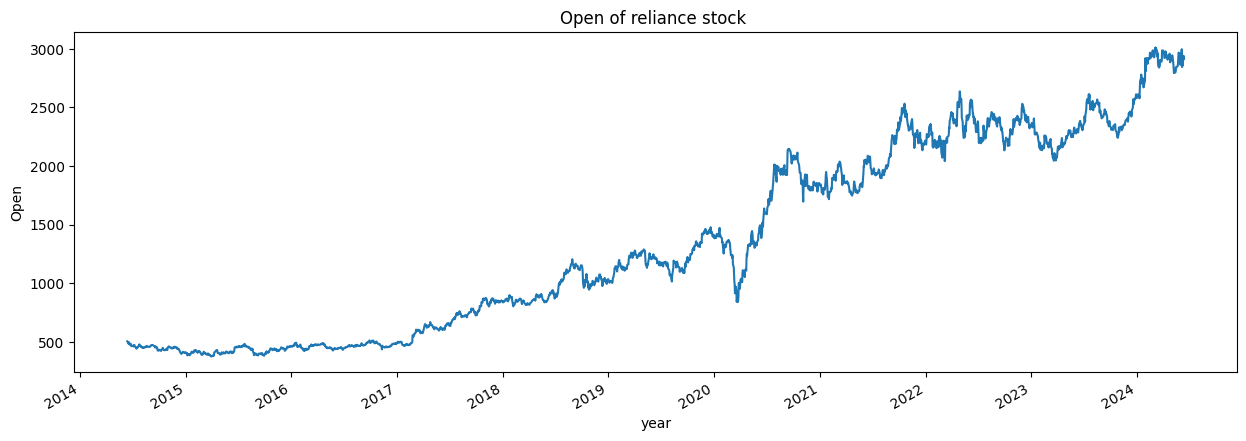

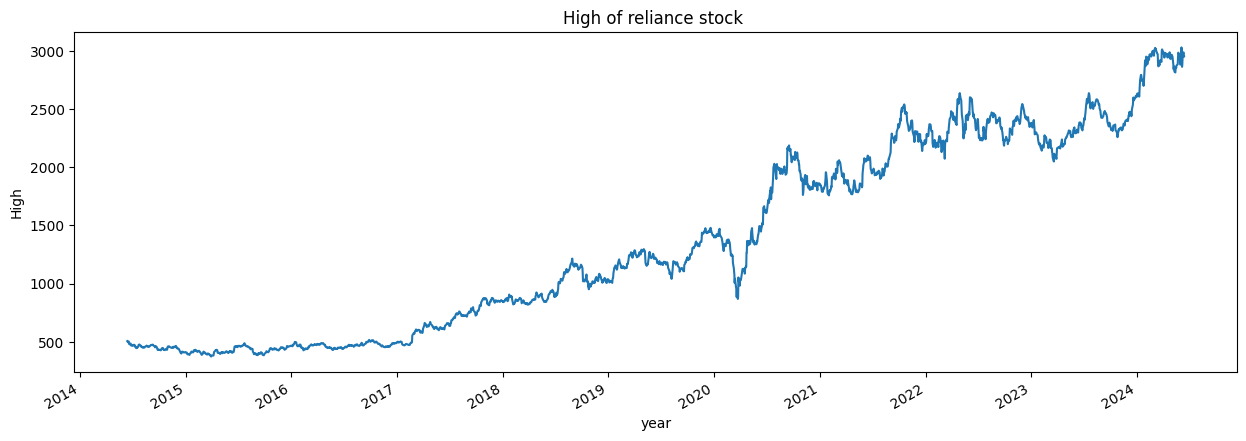

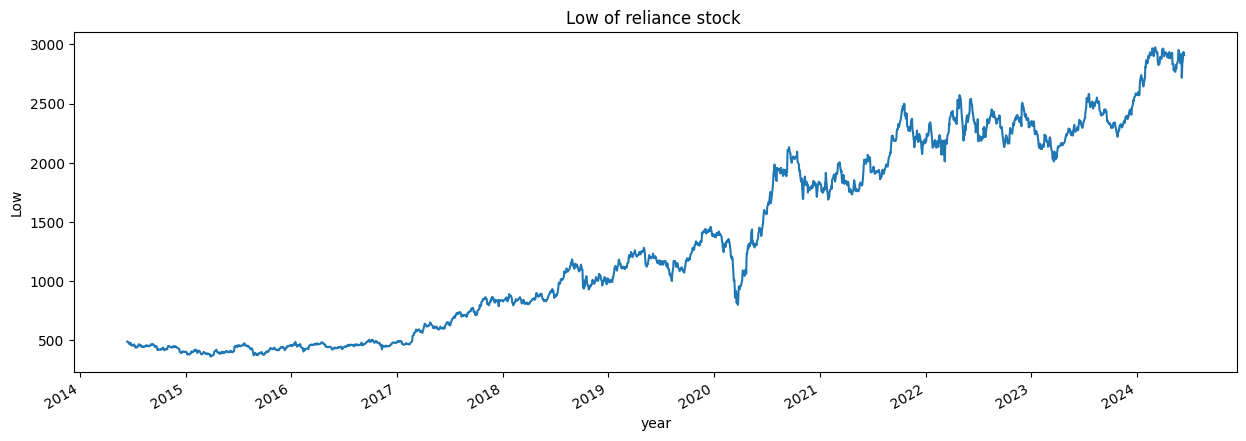

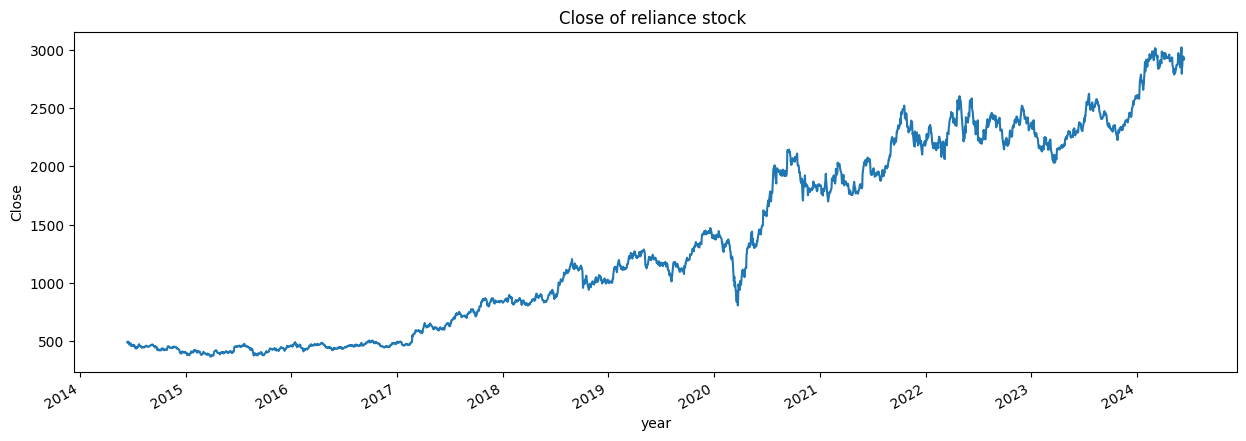

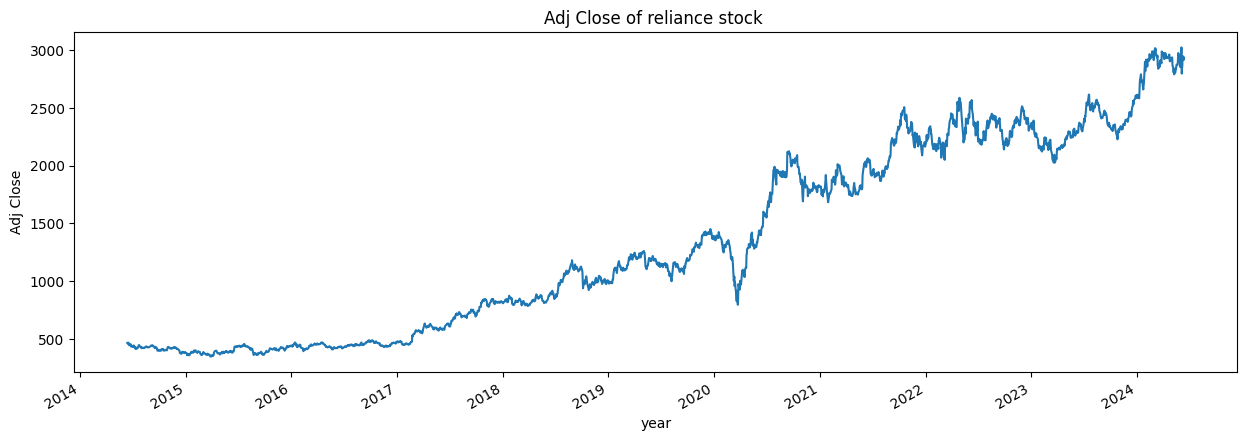

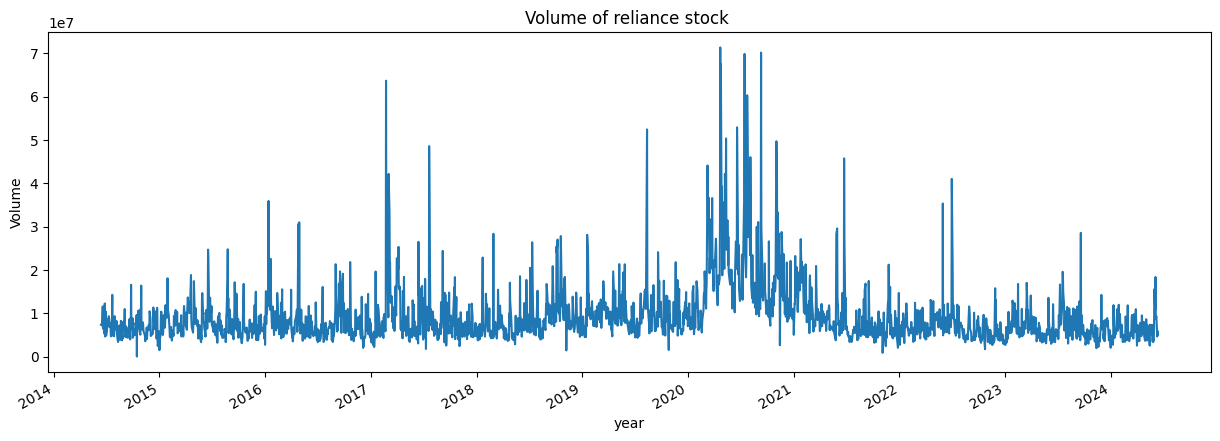

In [ ]:
for column in rel_data.columns:
    plot_data((15,5),rel_data[column] ,column)

In [ ]:
for i in range(2014,2025):
    print(i,list(rel_data.index.year).count(i))

2014 133
2015 246
2016 246
2017 248
2018 246
2019 243
2020 251
2021 248
2022 248
2023 245
2024 109


In [ ]:
rel_data['ma_for_250_days'] = rel_data['Adj Close'].rolling(250).mean()

In [ ]:
rel_data['ma_for_250_days']

Date
2014-06-13            NaN
2014-06-16            NaN
2014-06-17            NaN
2014-06-18            NaN
2014-06-19            NaN
                 ...     
2024-06-06    2603.679640
2024-06-07    2606.352471
2024-06-10    2609.061367
2024-06-11    2611.682080
2024-06-12    2614.274870
Name: ma_for_250_days, Length: 2463, dtype: float64

In [ ]:
rel_data['ma_for_250_days'][0:250].tail()

Date
2015-06-17           NaN
2015-06-18           NaN
2015-06-19           NaN
2015-06-22           NaN
2015-06-23    403.474999
Name: ma_for_250_days, dtype: float64

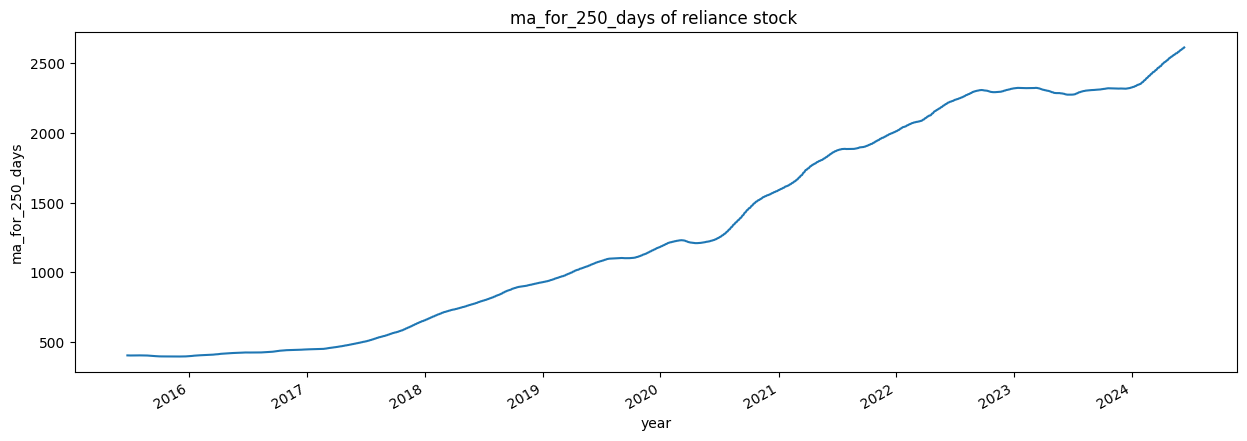

In [ ]:
plot_data((15,5), rel_data['ma_for_250_days'] , 'ma_for_250_days')

In [ ]:
rel_data['ma_for_100_days'] = rel_data['Adj Close'].rolling(100).mean()

<Figure size 640x480 with 0 Axes>

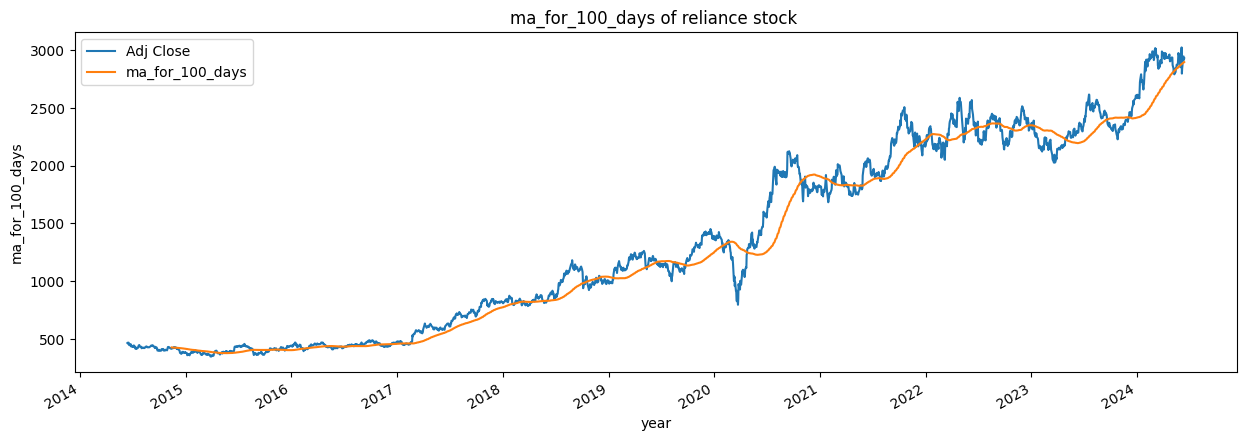

In [ ]:
plot_data((15,5), rel_data[['Adj Close','ma_for_100_days']] , 'ma_for_100_days')

<Figure size 640x480 with 0 Axes>

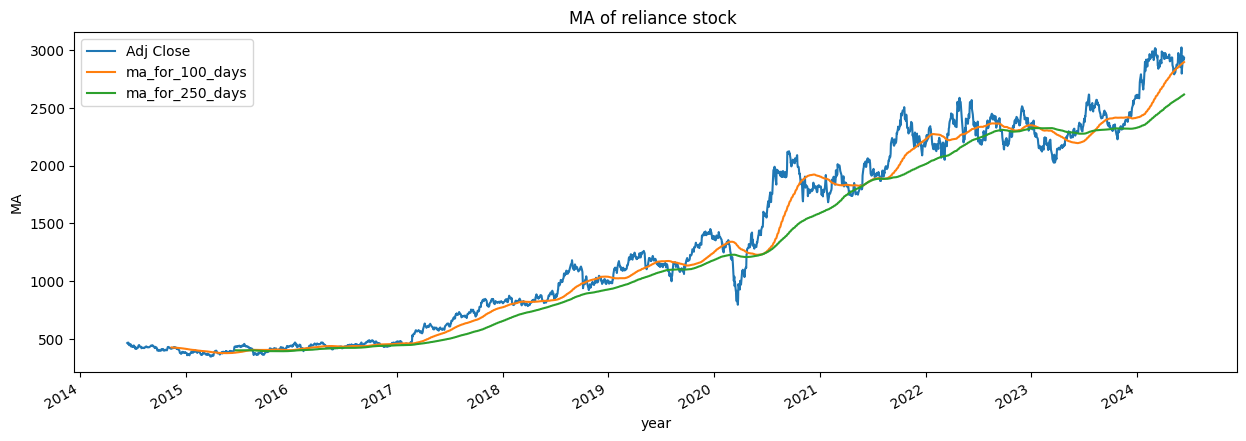

In [ ]:
plot_data((15,5), rel_data[['Adj Close','ma_for_100_days','ma_for_250_days']] , 'MA')

In [ ]:
rel_data['percentage_change'] = rel_data['Adj Close'].pct_change()

In [ ]:
rel_data[['Adj Close','percentage_change']].head()

Adj Close  percentage_change
Date                                     
2014-06-13  466.453979                NaN
2014-06-16  459.361725          -0.015205
2014-06-17  469.967773           0.023089
2014-06-18  459.922150          -0.021375
2014-06-19  449.294464          -0.023108

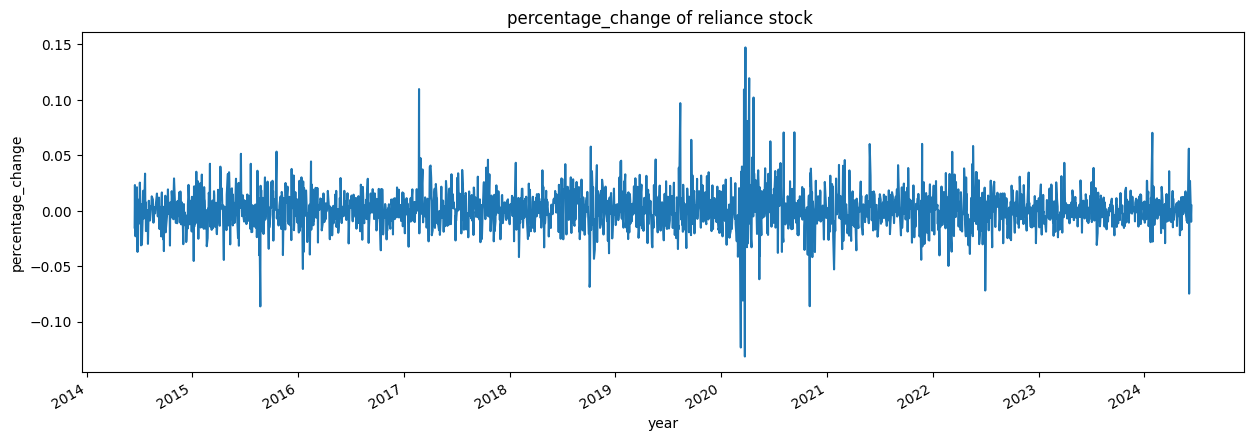

In [ ]:
plot_data((15,5), rel_data['percentage_change'] , 'percentage_change')

Data Processing

In [ ]:
adj_close_price = rel_data[['Adj Close']]

In [ ]:
max(adj_close_price.values),min(adj_close_price.values)

(array([3020.64990234]), array([349.54946899]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adj_close_price)
scaled_data

array([[0.04376642],
       [0.04111124],
       [0.04508191],
       ...,
       [0.97085476],
       [0.95982936],
       [0.96480851]])

In [ ]:
len(scaled_data)

2463

In [ ]:
import numpy as np

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
import pandas as pd
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0] ,y_data[0]

(array([[0.04376642],
        [0.04111124],
        [0.04508191],
        [0.04132105],
        [0.03734229],
        [0.0364384 ],
        [0.03667242],
        [0.04020735],
        [0.03877884],
        [0.03246769],
        [0.03249999],
        [0.03303265],
        [0.0318382 ],
        [0.03349265],
        [0.03159608],
        [0.03570397],
        [0.03493727],
        [0.02974793],
        [0.03070026],
        [0.03009499],
        [0.02513968],
        [0.02437297],
        [0.0260597 ],
        [0.02888439],
        [0.02772223],
        [0.02679411],
        [0.03016759],
        [0.03554255],
        [0.03591381],
        [0.03717281],
        [0.03407373],
        [0.03145083],
        [0.03153958],
        [0.03158801],
        [0.02672149],
        [0.02812576],
        [0.02794014],
        [0.0286342 ],
        [0.02881983],
        [0.02739941],
        [0.02739941],
        [0.02802892],
        [0.02895702],
        [0.03102307],
        [0.0326533 ],
        [0

Splitting Data

In [ ]:
int(len(x_data)*0.7)

1654

In [ ]:
2462-100-int(len(x_data)*0.7)

708

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1654, 100, 1)
(1654, 1)
(709, 100, 1)
(709, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
sq = Sequential()
sq.add(LSTM(128 , return_sequences=True , input_shape=(x_train.shape[1],1)))
sq.add(LSTM(64 , return_sequences= False))
sq.add(Dense(25))
sq.add(Dense(1))

In [ ]:
sq.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
sq.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
1654/1654 [==============================] - 160s 95ms/step - loss: 9.7149e-04
Epoch 2/2
1654/1654 [==============================] - 154s 93ms/step - loss: 4.5188e-04


In [ ]:
sq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x_pred = sq.predict(x_test)

23/23 [==============================] - 2s 58ms/step


In [ ]:
x_pred

array([[0.5864001 ],
       [0.58300734],
       [0.5799098 ],
       [0.5816771 ],
       [0.58614546],
       [0.59190875],
       [0.5994891 ],
       [0.60082376],
       [0.5984334 ],
       [0.59641445],
       [0.597929  ],
       [0.59946775],
       [0.604156  ],
       [0.6112977 ],
       [0.6162133 ],
       [0.61976564],
       [0.61923736],
       [0.61886054],
       [0.6206894 ],
       [0.624598  ],
       [0.63088226],
       [0.635785  ],
       [0.6431234 ],
       [0.64774424],
       [0.6509736 ],
       [0.65543264],
       [0.6684436 ],
       [0.68403935],
       [0.6973505 ],
       [0.7047848 ],
       [0.70725906],
       [0.70159787],
       [0.6945838 ],
       [0.69012755],
       [0.6930115 ],
       [0.69372195],
       [0.69420207],
       [0.69558656],
       [0.69953716],
       [0.7092435 ],
       [0.71712095],
       [0.7263503 ],
       [0.7354555 ],
       [0.7395167 ],
       [0.7397084 ],
       [0.7388601 ],
       [0.7411325 ],
       [0.749

In [ ]:
inv_prediction = scaler.inverse_transform(x_pred)
inv_prediction

array([[1915.883 ],
       [1906.8207],
       [1898.5469],
       [1903.2675],
       [1915.2029],
       [1930.5973],
       [1950.8451],
       [1954.4102],
       [1948.0251],
       [1942.6324],
       [1946.678 ],
       [1950.7881],
       [1963.3109],
       [1982.3871],
       [1995.5172],
       [2005.0057],
       [2003.5947],
       [2002.5881],
       [2007.4733],
       [2017.9136],
       [2034.6995],
       [2047.795 ],
       [2067.3967],
       [2079.7395],
       [2088.3655],
       [2100.276 ],
       [2135.0295],
       [2176.6873],
       [2212.2427],
       [2232.1006],
       [2238.7095],
       [2223.588 ],
       [2204.8525],
       [2192.9495],
       [2200.6528],
       [2202.5505],
       [2203.833 ],
       [2207.531 ],
       [2218.0835],
       [2244.01  ],
       [2265.0515],
       [2289.704 ],
       [2314.0251],
       [2324.8728],
       [2325.385 ],
       [2323.119 ],
       [2329.189 ],
       [2350.5046],
       [2356.6025],
       [2359.8428],


In [ ]:
inv_y_test_prediction = scaler.inverse_transform(y_test)
inv_y_test_prediction

array([[1882.33654785],
       [1865.8807373 ],
       [1899.98413086],
       [1913.96472168],
       [1928.63293457],
       [1956.59411621],
       [1915.15661621],
       [1904.24694824],
       [1914.23974609],
       [1941.05493164],
       [1934.82104492],
       [1967.04504395],
       [1992.57678223],
       [1984.09680176],
       [1991.79760742],
       [1969.42871094],
       [1982.35510254],
       [2001.92785645],
       [2019.2545166 ],
       [2044.78637695],
       [2041.9901123 ],
       [2081.27319336],
       [2070.18066406],
       [2078.38549805],
       [2103.41308594],
       [2189.68017578],
       [2223.69213867],
       [2237.71850586],
       [2228.96337891],
       [2223.69213867],
       [2174.14111328],
       [2171.29907227],
       [2180.3293457 ],
       [2226.07543945],
       [2191.55932617],
       [2195.04345703],
       [2204.53173828],
       [2228.18408203],
       [2282.63964844],
       [2276.03881836],
       [2314.3137207 ],
       [2335.949

In [ ]:
rmse= np.sqrt(np.mean(( inv_prediction - inv_y_test_prediction)**2))
rmse

46.2569794181678

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test_prediction.reshape(-1),
    'predictions': inv_prediction.reshape(-1)
 } ,
    index = rel_data.index[splitting_len+100:]
)
ploting_data.head()

original_test_data  predictions
Date                                       
2021-07-29         1882.336548  1915.883057
2021-07-30         1865.880737  1906.820679
2021-08-02         1899.984131  1898.546875
2021-08-03         1913.964722  1903.267456
2021-08-04         1928.632935  1915.202881

<Figure size 640x480 with 0 Axes>

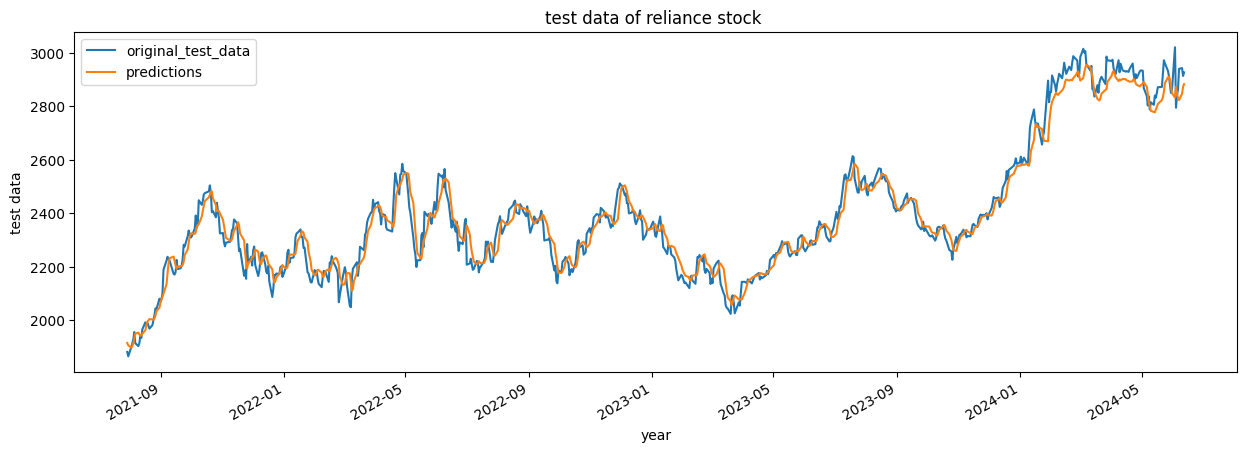

In [ ]:
plot_data((15,5), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

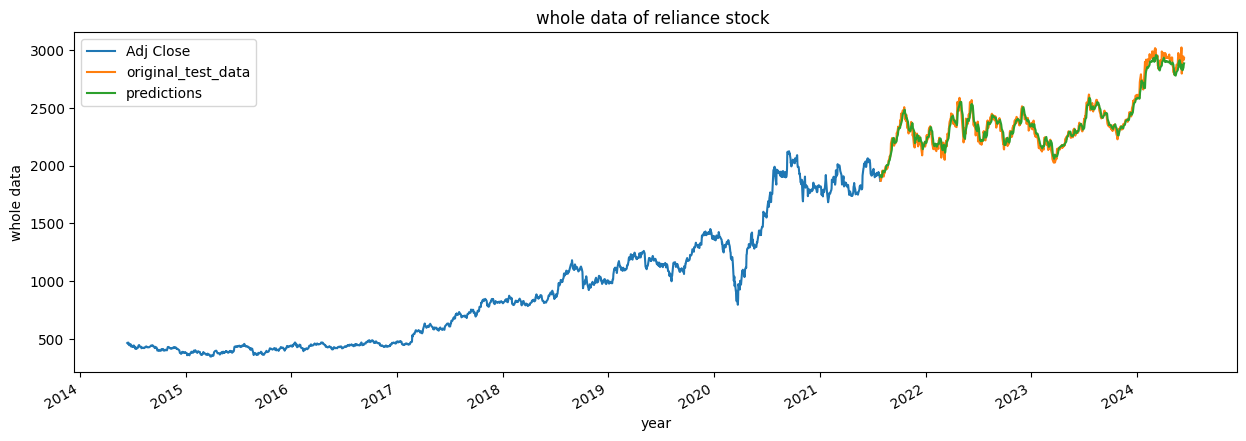

In [ ]:
plot_data((15,5), pd.concat([adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
sq.save("Latest_stock_price_model.keras")